In [14]:
name1= "\u0930\u094b\u0936\u0928 \u0915\u0941\u092e\u093e\u0930 \u092f\u093e\u0926\u0935"
name2= "\u0935\u0948\u0936\u093E\u0932\u0940 \u0907\u0902\u0917\u0933\u0947"
print("The Assignment-3(Machine Learning Algorithm) is done by {0} under the guidance of {1}.".format(name1,name2))

The Assignment-3(Machine Learning Algorithm) is done by रोशन कुमार यादव under the guidance of वैशाली इंगळे.


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split as ts
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("C:/Users/AJAY ROSHAN YADAV/Downloads/Admission_Pred.csv")

In [4]:
desc = df['Chance of Admit'].describe()
threshold = desc['75%']
print("75th percentile of Chance of Admit:", threshold)
df["Admitted"] = (df["Chance of Admit"] >= threshold).astype(int)
df = df.drop(columns=["Chance of Admit"])

75th percentile of Chance of Admit: 0.82


In [5]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admitted
0,1,337,118,4,4.5,4.5,9.65,1,1
1,2,324,107,4,4.0,4.5,8.87,1,0
2,3,316,104,3,3.0,3.5,8.00,1,0
3,4,322,110,3,3.5,2.5,8.67,1,0
4,5,314,103,2,2.0,3.0,8.21,0,0
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,1
496,497,337,117,5,5.0,5.0,9.87,1,1
497,498,330,120,5,4.5,5.0,9.56,1,1
498,499,312,103,4,4.0,5.0,8.43,0,0


In [60]:
X = df.drop(columns=["Admitted"])
y = df["Admitted"]

In [61]:
X_train, X_test, y_train, y_test = ts(X, y, test_size=0.2, random_state=42)

In [62]:
clf = DecisionTreeClassifier(criterion='gini',random_state=42,max_depth=3,min_samples_split=4,min_samples_leaf=2  )
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=2, min_samples_split=4,
                       random_state=42)

In [63]:
y_pred_gini = clf.predict(X_test)

In [64]:
print("Gini confusion matrix....")
print("Accuracy:", accuracy_score(y_test, y_pred_gini))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_gini))
print("\nClassification Report:\n", classification_report(y_test, y_pred_gini))

Gini confusion matrix....
Accuracy: 0.94

Confusion Matrix:
 [[71  2]
 [ 4 23]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96        73
           1       0.92      0.85      0.88        27

    accuracy                           0.94       100
   macro avg       0.93      0.91      0.92       100
weighted avg       0.94      0.94      0.94       100



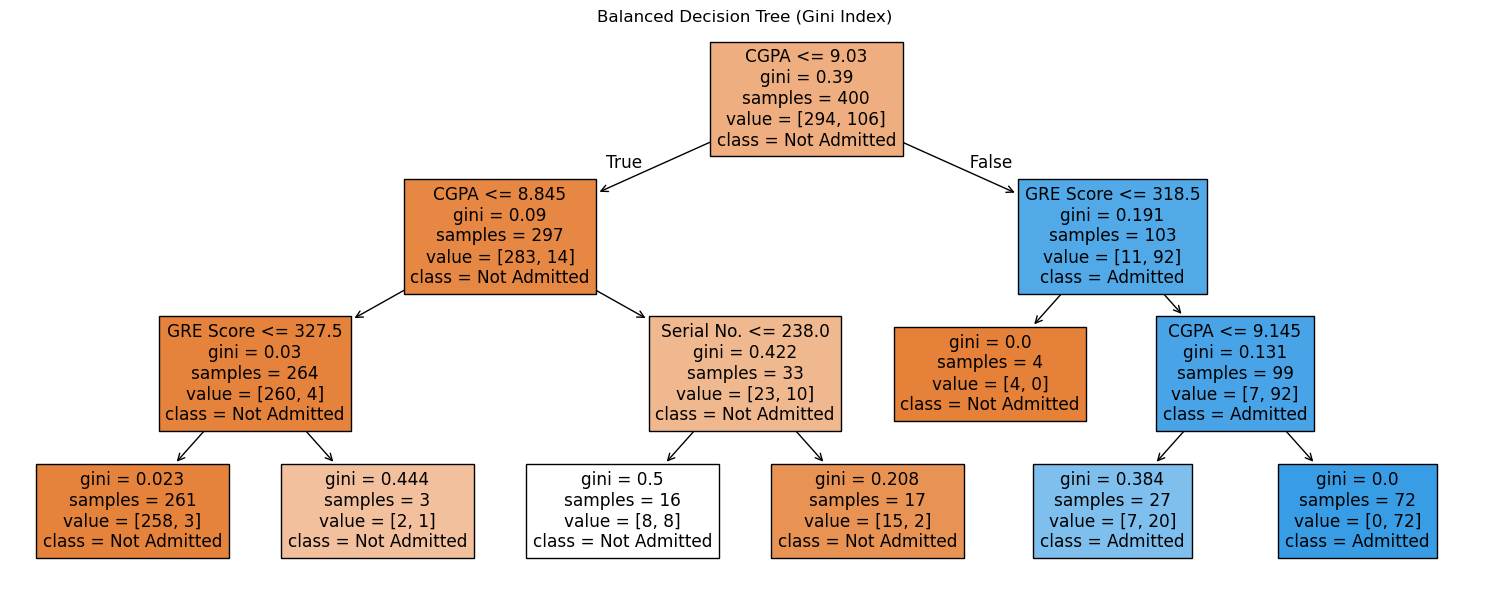

In [65]:
plt.figure(figsize=(15, 6))
plot_tree(clf, feature_names=X.columns, class_names=['Not Admitted', 'Admitted'], filled=True)
plt.title("Balanced Decision Tree (Gini Index)")

plt.tight_layout()
plt.show()

In [66]:
clf1 = DecisionTreeClassifier(criterion='entropy',random_state=42,max_depth=3,min_samples_split=4,min_samples_leaf=2)
clf1.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=2,
                       min_samples_split=4, random_state=42)

In [67]:
y_pred_entropy = clf1.predict(X_test)

In [68]:
print("Entropy.....")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_entropy))
print("Accuracy:", accuracy_score(y_test, y_pred_entropy))
print("Classification Report:\n", classification_report(y_test, y_pred_entropy))

Entropy.....
Confusion Matrix:
 [[70  3]
 [ 4 23]]
Accuracy: 0.93
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95        73
           1       0.88      0.85      0.87        27

    accuracy                           0.93       100
   macro avg       0.92      0.91      0.91       100
weighted avg       0.93      0.93      0.93       100



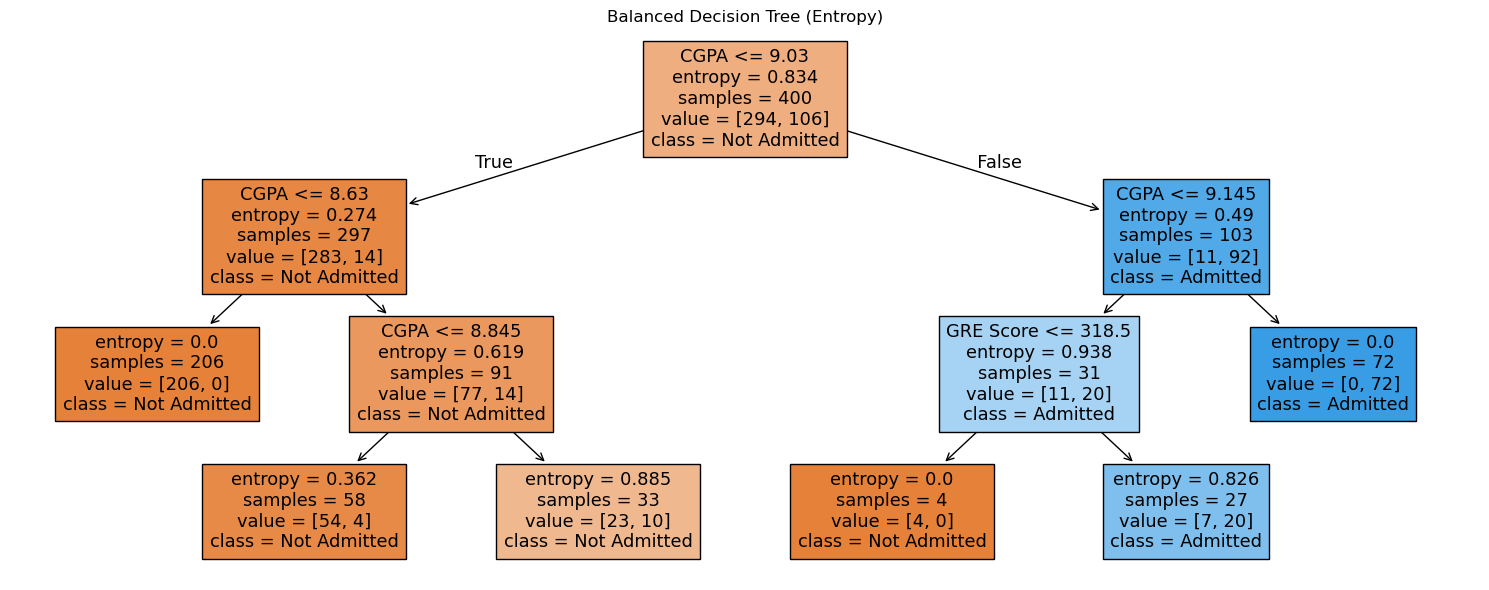

In [69]:
plt.figure(figsize=(15, 6))
plot_tree(clf1, feature_names=X.columns, class_names=['Not Admitted', 'Admitted'], filled=True)
plt.title("Balanced Decision Tree (Entropy)")

plt.tight_layout()
plt.show()